In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from luwiji.knn import illustration

## Train val-test split

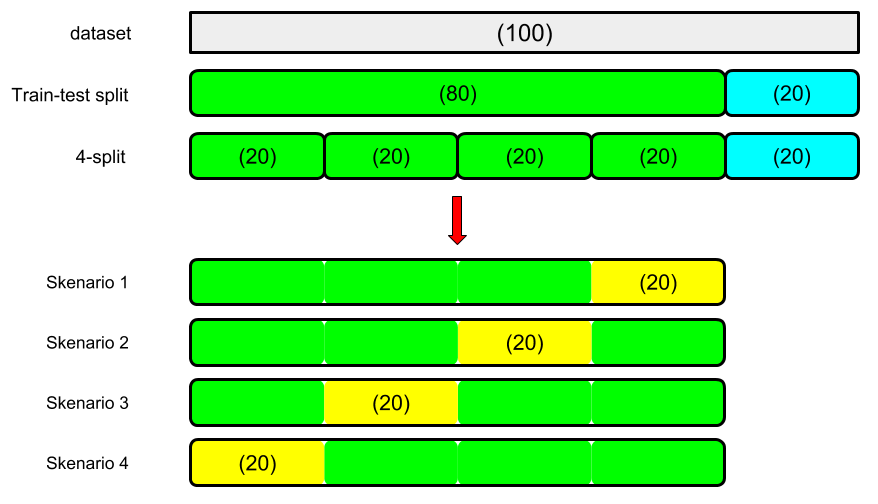

In [6]:
illustration.train_val_test

In [10]:
data =pd.read_csv('data/titanic.csv', index_col='PassengerId')

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.drop(['Name', 'Age', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [32]:
# Split Data

X = data.drop(columns='Survived', axis=1)
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 6), (712,), (179, 6), (179,))

### Preprocessing Data

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [23]:
numerical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy='median')),
    ("scaler", MinMaxScaler())
])

In [24]:
categorical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder())
])

#### Combine pipeline

In [26]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
693,3,male,0,0,56.4958,S
482,2,male,0,0,0.0000,S
528,1,male,0,0,221.7792,S
856,3,female,0,1,9.3500,S
802,2,female,1,1,26.2500,S


In [29]:
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['SibSp', 'Fare', 'Parch']),
    ('categoric', categorical_pipeline, ['Pclass', 'Sex', 'Embarked'])
])

In [30]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

In [34]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Fare', 'Parch']),
                                                 ('categoric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('algo', KNeighborsClassifier())])

In [35]:
pipeline.score(X_test, y_test)

0.776536312849162